In [1]:
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
from pprint import pprint
from random import randint
import numpy as np
from random import gauss
#import matplotlib as mpl
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))
set1 = cm.get_cmap(plt.get_cmap('Set1'))

def tableau20(color):
    # Use coordinated colors. These are the "Tableau 20" colors as
    # RGB. Each pair is strong/light. For a theory of color
    tableau20 = [(31 , 119, 180), (174, 199, 232), # blue        [ 0,1 ]
                 (255, 127, 14 ), (255, 187, 120), # orange      [ 2,3 ]
                 (44 , 160, 44 ), (152, 223, 138), # green       [ 4,5 ]
                 (214, 39 , 40 ), (255, 152, 150), # red         [ 6,7 ]
                 (148, 103, 189), (197, 176, 213), # purple      [ 8,9 ]
                 (140, 86 , 75 ), (196, 156, 148), # brown       [10,11]
                 (227, 119, 194), (247, 182, 210), # pink        [12,13]
                 (188, 189, 34 ), (219, 219, 141), # yellow      [14,15]
                 (23 , 190, 207), (158, 218, 229), # cyan        [16,17]
                 (65 , 68 , 81 ), (96 , 99 , 106), # gray        [18,19]
                 (127, 127, 127), (143, 135, 130), # gray        [20,21]
                 (165, 172, 175), (199, 199, 199), # gray        [22,23]
                 (207, 207, 207)]                   # gray        [24]
    # Scale the RGB values to the [0, 1] range, which is the format
    # matplotlib accepts.
    r, g, b = tableau20[color]
    return (round(r/255.,1), round(g/255.,1), round(b/255.,1))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

# Homogeneous Dynamic Resources distirbution
Since the resources are homogeneous their performance is sampled from the same distribution. This distribution is based on a normal of mean 1 and sigma 

In [2]:
help(gauss)

Help on method gauss in module random:

gauss(mu, sigma) method of random.Random instance
    Gaussian distribution.
    
    mu is the mean, and sigma is the standard deviation.  This is
    slightly faster than the normalvariate() function.
    
    Not thread-safe without a lock around calls.



In [3]:
dist = list()
for _ in range(1000000):
    dist.append(gauss(1,4900/76000))

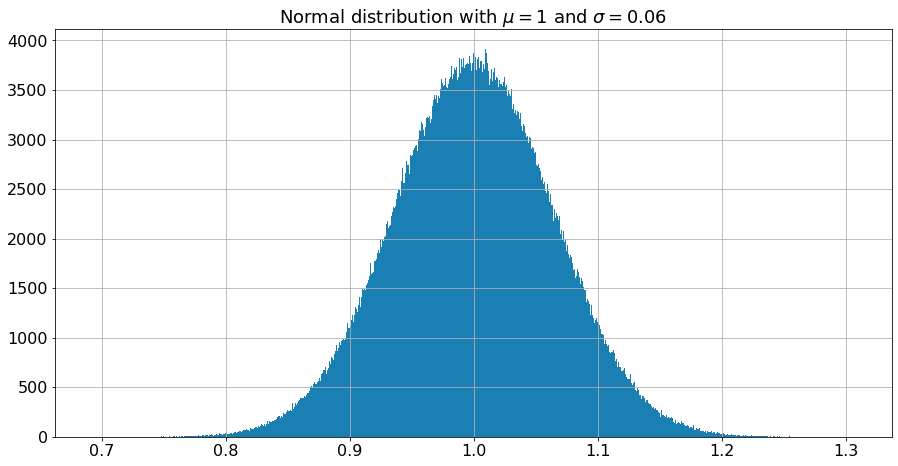

In [4]:
fig, axis = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(15,7.5)
_ = axis.hist(dist,bins=1000,color=tableau20(0))
_ = axis.set_xticklabels(np.around(axis.get_xticks(), decimals=2).tolist(),fontsize=16)
_ = axis.set_yticklabels((axis.get_yticks()).astype('int').tolist(),fontsize=16)
_ = axis.grid('on')
_ = axis.set_title('Normal distribution with $\mu = 1$ and $\sigma = 0.06$', fontsize=18)
_ = fig.savefig('../Figures/DyRes.pdf',bbox_inches='tight')

In [5]:
resources = np.zeros((128, 4096))

for i in range(128):
    for j in range(4096):
        resources[i,j] = gauss(1, 4900 / 76000)

In [6]:
np.save('../Data/homogeneous_resources_dyn.npy', resources)

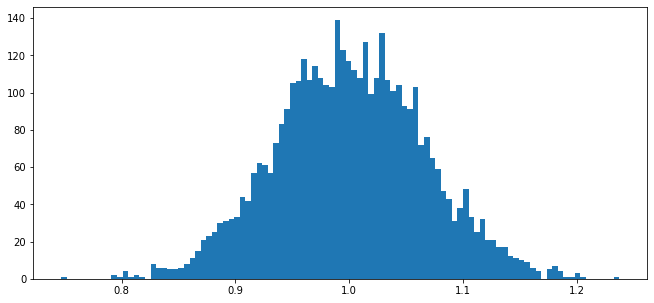

In [7]:
fig, axis = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(11,5)
_ = axis.hist(resources[1,:],bins=100)